# Mini project 10.5.4

# Clustering

## Set up

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('ggplot')
%matplotlib inline

import seaborn as sns
sns.set_context('paper')

from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
# import sklearn.decomposition
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

## Load data

In [2]:
df_offers = pd.read_excel("./WineKMC.xlsx", sheet_name=0)
df_offers.columns = ["offer_id", "campaign", "varietal", "min_qty", "discount", "origin", "past_peak"]

# # Check
# df_offers.shape
# df_offers.head()

In [3]:
df_transactions = pd.read_excel("./WineKMC.xlsx", sheet_name=1)
df_transactions.columns = ["customer_name", "offer_id"]
df_transactions['n'] = 1

# # Check
# df_transactions.shape
# df_transactions.head()

## Exercise I:  Prep data 

In [4]:
# Merge dataframe
df_merged = pd.merge(df_transactions, df_offers, how='left', on='offer_id')

# Pivot into a dataframe that's ready for ML
df = df_merged.pivot(index='customer_name', columns='offer_id', values='n')

# Clean up values by filling na with 0
df.fillna(0, inplace=True)
df.reset_index(inplace=True)

# # Check
# df
# df[df.customer_name == 'Smith']

In [5]:
x_cols = df.iloc[:, 1:].to_numpy()

# # Check
# x_cols

**Preliminary question:**

* Generally, the sum-of-squares error will get smaller as K increases.  Aka, SS will be minimized when K = n.  
* However, we're looking for big drop offs in SS.  Those that we get by getting the "right" number of clusters.

## Exercise II: Tune k-means via elblow method

In [6]:
# Tune for K via elbow method

# Calc various scoresa(aka, inertia or SS) as per various ks
scores_tune = []
k_values = []
km_tune_pred_all = []

for k in range(2, 11):
    
    # Instantiate model
    km_tune = KMeans(n_clusters = k, random_state = 42)
    
    # Fit model
    km_tune.fit(x_cols)
    
    # Predict with model (for later work)
    km_tune_pred_this = km_tune.predict(x_cols) 
 
    # Collect k's and intera score (aka, SS by cluster)
    k_values.append(k)
    scores_tune.append(km_tune.inertia_)
    km_tune_pred_all.append(km_tune_pred_this)

# # Check 
# print(k_tune)
# print(scores_tune)
# km_tune_pred_all

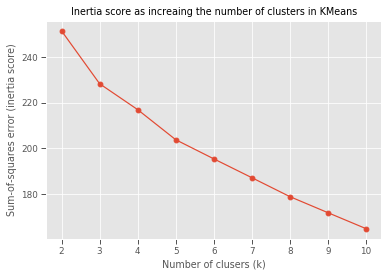

In [7]:
# Plot k v. inertia

g = plt.plot(k_values, scores_tune, marker='o')
g = plt.xlabel('Number of clusers (k)')
g = plt.ylabel('Sum-of-squares error (inertia score)')
g = plt.title('Inertia score as increaing the number of clusters in KMeans')

**Takeaways**

* To pick a k, I'm looking for the the k at the elbow
* That's when the rate of decrease significantly declines.
* I see more of linear relationship, not a curve with an 'elbow'
* I'm going to pick k = 6
* Clearly, the challenge is reading the graph

### Predict with best model

In [8]:
# Instantiate
km_1 = KMeans(n_clusters = 6, random_state = 42)

# Fit
km_1.fit(x_cols)

# Predict
km_1_pred = km_1.predict(x_cols)

# # Check
# km_1_pred

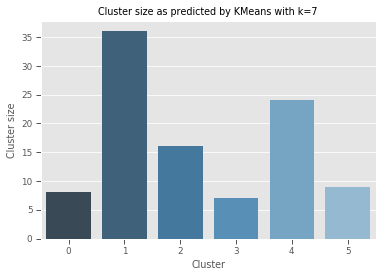

In [9]:
# Plot predictions as bar chart

g = sns.countplot(km_1_pred, palette=sns.color_palette("Blues_d", 6))
g = plt.xlabel("Cluster")
g = plt.ylabel('Cluster size')
g = plt.title('Cluster size as predicted by KMeans with k=7')

## Exercise III:  Tune k-means with silhouette method

In [10]:
# Tune for K with the Silhouette method

# Calc various scores (aka, inertia or SS) as per various ks
k_values_2 = []
scores_tune_2 = []

for k in range(2, 11):
    
    # Instantiate model
    km_tune_2 = KMeans(n_clusters = k, random_state = 42)
    
    # Fit and predict 
    km_tune_2_pred = km_tune_2.fit_predict(x_cols)
    
    # Score model
    score_sil_avg = silhouette_score(x_cols, km_tune_2_pred)
    
    # Collect k's and intera score (aka, SS by cluster)
    k_values_2.append(k)
    scores_tune_2.append(score_sil_avg)

# # Check 
# print(k_values_2)
# print(scores_tune_2)

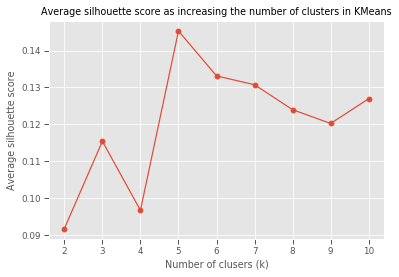

In [11]:
# Plot k v. average silhouette score

_ = plt.plot(k_values_2, scores_tune_2, marker='o')
_ = plt.xlabel('Number of clusers (k)')
_ = plt.ylabel('Average silhouette score')
_ = plt.title('Average silhouette score as increasing the number of clusters in KMeans')

**Takeaways:**

* Here, I'm looking for the k with the highest average silhouette score
* That's clearly at 5.  Aka, k = 5
* Aside, this method is easier to interpret visually 

## Exercise IV(a):  Evaluate clusters after PCA transformation

In [12]:
# Instantiate model
pca = PCA(n_components = 2)

# Fit model
pca.fit(x_cols)

# Tranform
pca_trans = pca.transform(x_cols)

# # Check
# pca_trans
# type(pca_trans)

In [13]:
# # Refresh on slicing np.arrays

# test = np.array([[1, 2], [3, 4], [5, 6]])
# test[:, 0]
# test[1, :]
# test

In [14]:
# Create data frame

# Create dataframe of names and pca componets
results_pca_dict  = {'customer_name': df.iloc[:, 0],
                'x_from_pca': pca_trans[:, 0],
                'y_from_pca': pca_trans[:, 1],
                 }
results_pca_df = pd.DataFrame(results_pca_dict )

# Add labels from earlier model
for k in range(0, 9):
    col_name = "k_" + str(k+2)
    results_pca_df[col_name] = km_tune_pred_all[k]
    
# # Check
# results_pca_df

In [15]:
# # Check
# # Look at the new dataframe by column name
# k = 8
# col_name = "k_" + str(k)
# print(np.unique(results_pca_df[col_name]))

# # Compare that to what's in the original set
# print(np.unique(km_tune_pred_all[k-2]))

# # Bottom line, the underlying data is correct

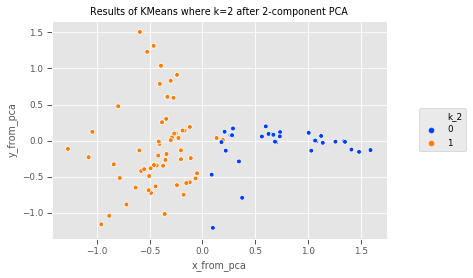

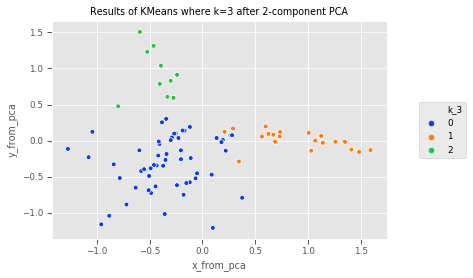

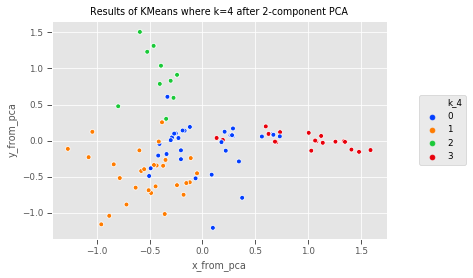

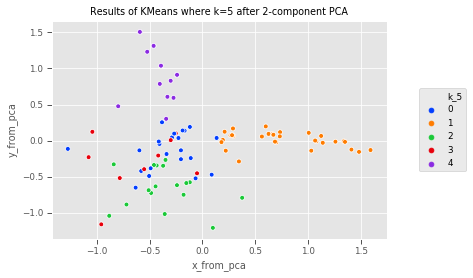

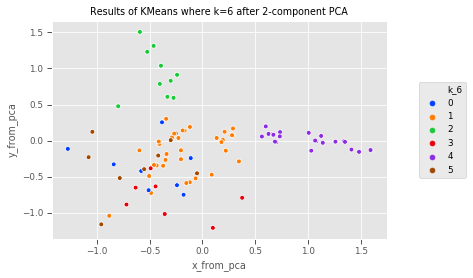

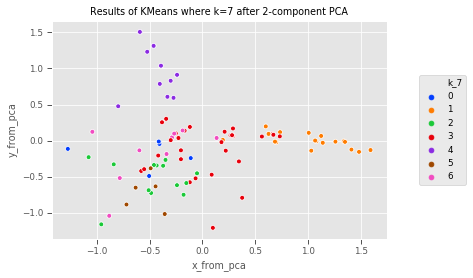

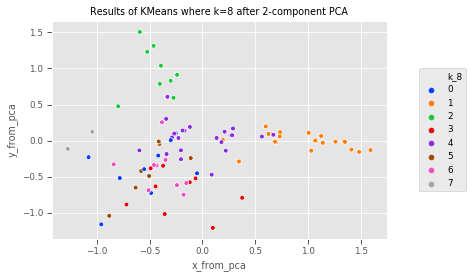

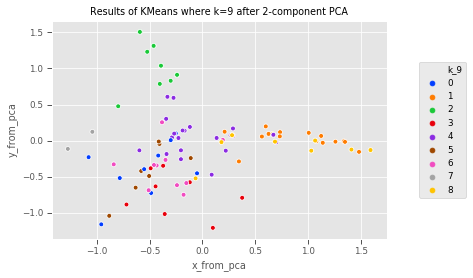

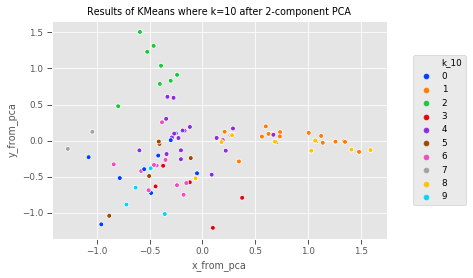

In [16]:
for k in range(2, 11):
    col_name = "k_" + str(k)
    g = sns.scatterplot(results_pca_df['x_from_pca'], 
                         results_pca_df['y_from_pca'], 
                         hue=results_pca_df[col_name],
                         legend='full',
                         palette=sns.color_palette('bright', results_pca_df[col_name].unique().shape[0])
                        )
    g.set_title('Results of KMeans where k=' + str(k) + ' after 2-component PCA')
    g.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1)
    plt.show()

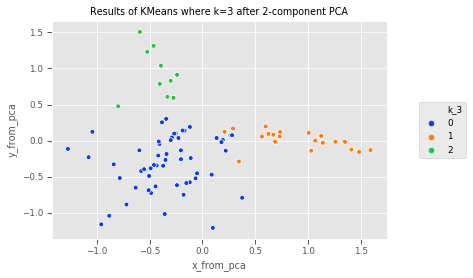

In [17]:
# Re-create the 3-cluster scatterplot

k = 3
col_name = "k_" + str(k)
g = sns.scatterplot(results_pca_df['x_from_pca'], 
                         results_pca_df['y_from_pca'], 
                         hue=results_pca_df[col_name],
                         legend='full',
                         palette=sns.color_palette('bright', results_pca_df[col_name].unique().shape[0])
                        )
g.set_title('Results of KMeans where k=' + str(k) + ' after 2-component PCA')
g.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.show()

**Takeaways:**
    
* The "best" looking number of clusters is 3, IMO.  
* Each cluster seems "distinct" with minimal overlap.

Note:  

* It took some tinkering to pass a pallet into seaborn's scatterplot. 
* The trick was getting the right number of colors on each graph.   

## Exercise IV(b):  Find a business explanation for 3 clusters

In [18]:
# Improve dataframe for exploratory analysis

# Get names and labels
results_k3 = results_pca_df[['customer_name', 'k_3']].copy()

# Merge labels back into a master dataframe
df_interpret = pd.merge(df_merged, results_k3, how='inner', on='customer_name')

# Convert the categoricals
df_interpret['mo_code'] = df_interpret['campaign'].astype("category").cat.codes
df_interpret['org_code'] = df_interpret['origin'].astype("category").cat.codes
df_interpret['pst_peak_code'] = df_interpret['past_peak'].astype("category").cat.codes
df_interpret['var_code'] = df_interpret['varietal'].astype("category").cat.codes

# Drop irrelevant columns
df_interpret.drop(['customer_name', 'offer_id', 'n', 'campaign', 'varietal', 'origin', 'past_peak'], axis=1, inplace=True)

# Rearrange columns with the last column moved forward as the first column
cols = df_interpret.columns.to_list()
move_item = cols.pop(2)
cols.insert(0, move_item)
df_interpret_2 = df_interpret[cols]

# Add a new feature
df_interpret_2['qty_x_disc'] = df_interpret_2['min_qty'] * df_interpret_2['discount']

# # Check
# results_k3
# len(df_interpret['customer_name'].unique())
# df_interpret
# df_interpret_2

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


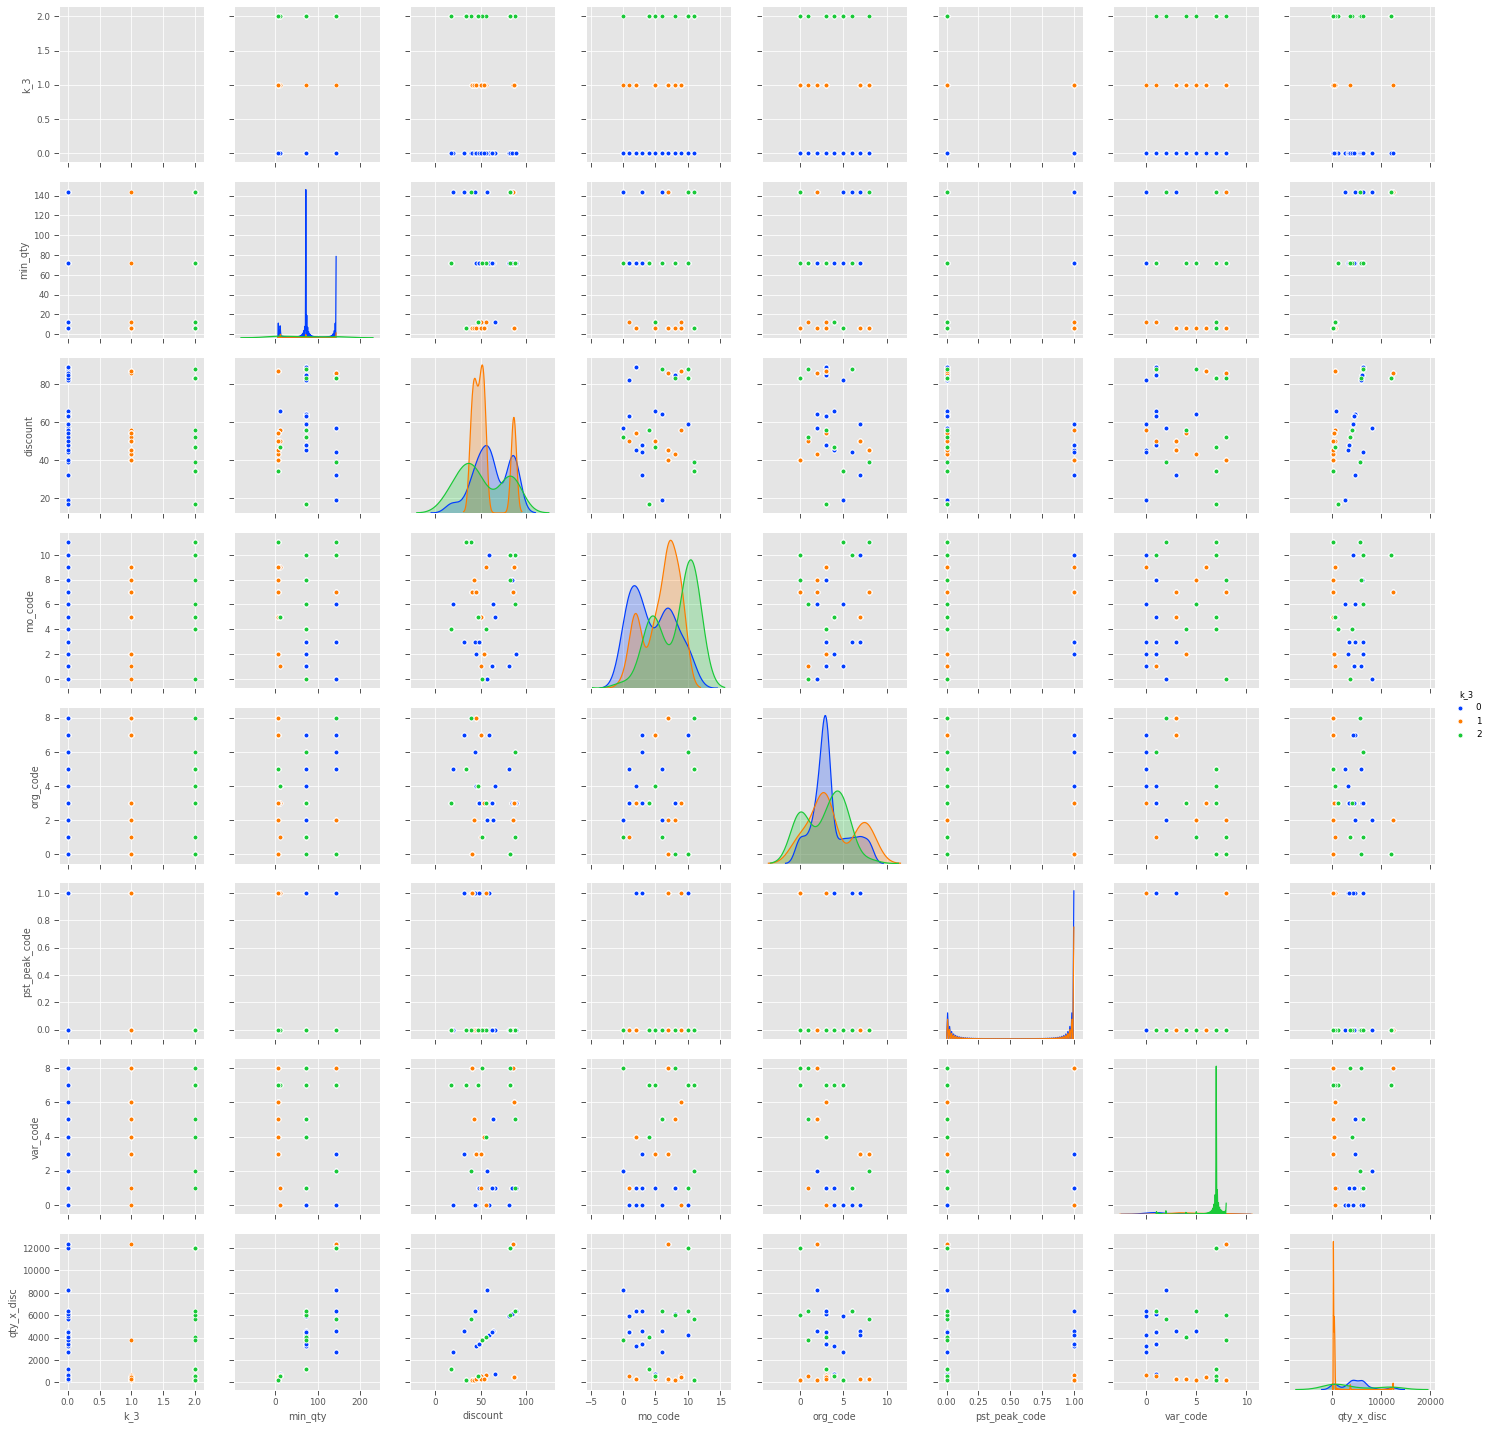

In [19]:
# Visually inspect pairplots for relations
g = sns.pairplot(df_interpret_2, 
                 hue='k_3', 
                 palette=sns.color_palette('bright', df_interpret_2['k_3'].unique().shape[0]))

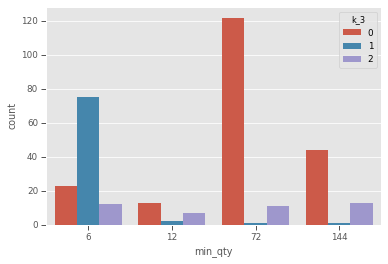

In [20]:
## Look at most promising feature
g = sns.countplot(x=df_interpret_2['min_qty'], hue=df_interpret_2['k_3'])

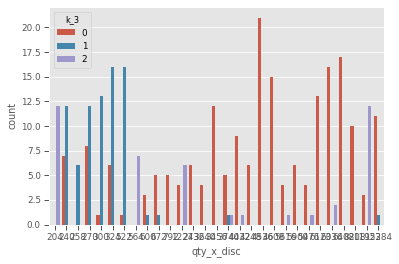

In [21]:
# Look at other promising feature
g = sns.countplot(x=df_interpret_2['qty_x_disc'], hue=df_interpret_2['k_3'])

**Takeaways:**

I'm looking for combinations of features that map to our three features and that make sense in business terms.

My original hypothesis is that type of wine should explain this.

* That is, some folks who reds, some buy whites and some buy champagne.  
* But it would take some feature work to translate from varietal up to basic type.

Instead, I'm looking at the data at hand.

* I'm not seeing all that much at quick glance.
* A promising feature with right sort of separation is min_qty.
* It maps to our labels across a number of variables--more cleanly than the others, at least.

Here's a business hypothesis:

* There are customers who order mainly by size. For example,
* Some might order a little, maybe 6 or 12 bottles
* Some might order a lot, maybe 72 and 144 bottles
* And there might be a third group who orders across sizes
* This probably relates to total price (aka, price x quantity) and total spend
* So, I added this feature

## Exercise V:  Tune PCA for number of components via Elbow method

In [22]:
import sklearn.decomposition

In [23]:
# Set total number of components
N = 10

# Instantiate model
pca_v2 = PCA(n_components = N)

# Fit model
pca_v2.fit(x_cols)

# Tranform with modelb
pca_trans_v2 = pca_v2.transform(x_cols)

# Get explained variance by components
y_pca_v2 = pca_v2.explained_variance_

# Get ints for each cluster
x_pca_v2 = list(range(1, 11)) 

# # Check
# y_pca_v2
# x_pca_v2

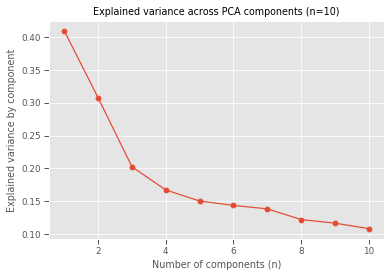

In [24]:
# Plot k v. inertia

g = plt.plot(x_pca_v2, y_pca_v2, marker='o')
g = plt.xlabel('Number of components (n)')
g = plt.ylabel('Explained variance by component')
g = plt.title('Explained variance across PCA components (n=10)')

**Takeaways:**

* I see a change in the rate of reduction at n=4
* That is, while each components is explaining more variance
* After 4, they're adding less additional explanatory power

## Exercise VI:  Model with 4 additional clustering methods

* Here, I'm going to use 'out-of-the-box' baseline models with a similar number of clusters.  
* If I can't set the number of clusters to 4, I'll do some simple manual tuning on one parameter.

### Affinity propagation

In [25]:
# Name model
ap_name = 'Affinity propagation'

# Instantiate
ap = AffinityPropagation(damping=.97)

# Fit and predict
ap_pred = ap.fit_predict(x_cols) 

# Score
ap_score = silhouette_score(x_cols, ap_pred)

# Collect number of clusters
ap_no = len(np.unique(ap_pred))

# Call out model parameters
print(ap)

# # Check
# ap_score
# ap_no

AffinityPropagation(affinity='euclidean', convergence_iter=15, copy=True,
                    damping=0.97, max_iter=200, preference=None, verbose=False)


### Spectral clustering

In [26]:
# Name model
sc_name = 'Spectral clustering'

# Instantiate
sc = SpectralClustering(n_clusters=4, random_state=42)
    
# Fit and predict
sc_pred = sc.fit_predict(x_cols) 

# Score
sc_score = silhouette_score(x_cols, sc_pred)

# Collect number of clusters
sc_no = len(np.unique(sc_pred))

# Call out model parameters
print(sc)# Check
# sc_score
# sc_no

SpectralClustering(affinity='rbf', assign_labels='kmeans', coef0=1, degree=3,
                   eigen_solver=None, eigen_tol=0.0, gamma=1.0,
                   kernel_params=None, n_clusters=4, n_init=10, n_jobs=None,
                   n_neighbors=10, random_state=42)


### Agglomerative clustering

In [27]:
# Name model
ac_name = 'Agglomerative clustering'

# Instantiate
ac = AgglomerativeClustering(n_clusters=4)
    
# Fit and predict
ac_pred = ac.fit_predict(x_cols) 

# Score
ac_score = silhouette_score(x_cols, ac_pred)

# Collect number of clusters
ac_no = len(np.unique(ac_pred))

# Call out model parameters
print(ac)

# # Check
# ac_score
# ac_no

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=4,
                        pooling_func='deprecated')


### DBSCAN

In [28]:
# Name model
db_name = 'DBSCAN'

# Instantiate
db = DBSCAN(eps=2, min_samples=1)
    
# Fit and predict
db_pred = db.fit_predict(x_cols) 

# # Score
db_score = silhouette_score(x_cols, db_pred)

# Call out model parameters
print(db)

# Call out the number of clusters
db_no = len(np.unique(db_pred))

# # Check
# db_pred
# db_score
# ds_no

DBSCAN(algorithm='auto', eps=2, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=1, n_jobs=None, p=None)


### Compare

In [29]:
# Create dataframe 
res_more_models_dict = {'model': [ap_name, sc_name , ac_name, db_name],
                        'no_clusters': [ap_no, sc_no, ac_no, db_no],
                        'silhouette_score': [ap_score, sc_score , ac_score, db_score],
                       }
res_more_models_df = pd.DataFrame(res_more_models_dict)
res_more_models_df.sort_values(by='silhouette_score', ascending=False)

,model,no_clusters,silhouette_score
3,DBSCAN,4,0.164688
2,Agglomerative clustering,4,0.128938
0,Affinity propagation,11,0.089546
1,Spectral clustering,4,0.086279


**Takeaway:**

* At first glance, it looks like DBSCAN has the lowest silhouette score.
* In practice, I'd want to do a full tuning effort.